In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

api_keys.api_key

'd6772f762eea4cb94474d2a5a3cd507d'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# api.openweathermap.org/data/2.5/weather?q=London

mycity = cities[0]
city_url = url + '&q=' + mycity
city_url

# weather.content
weather = requests.get(city_url).json()
weather

{'coord': {'lon': 168.86, 'lat': -46.19},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 59.49,
  'pressure': 1003.45,
  'humidity': 86,
  'temp_min': 59.49,
  'temp_max': 59.49,
  'sea_level': 1018.32,
  'grnd_level': 1003.45},
 'wind': {'speed': 8.75, 'deg': 210.014},
 'rain': {'3h': 0.99},
 'clouds': {'all': 76},
 'dt': 1547345390,
 'sys': {'message': 0.0047,
  'country': 'NZ',
  'sunrise': 1547312982,
  'sunset': 1547368543},
 'id': 6201424,
 'name': 'Mataura',
 'cod': 200}

In [4]:
city_weather_data = {"Temperature": weather["main"]["temp"],
                    "Humidity":weather["main"]["humidity"],
                    "Cloudiness":weather["clouds"]["all"],
                    "Wind Speed":weather["wind"]["speed"],
                    "Latitude":weather["coord"]["lat"],
                    "Longitude":weather["coord"]["lon"],
                    "City Name":city,
                    "Country":weather["sys"]["country"],
                    "Date":weather["dt"]}

city_weather_data

{'Temperature': 59.49,
 'Humidity': 86,
 'Cloudiness': 76,
 'Wind Speed': 8.75,
 'Latitude': -46.19,
 'Longitude': 168.86,
 'City Name': 'uray',
 'Country': 'NZ',
 'Date': 1547345390}

In [5]:
city_weather = []

for city in cities:
    try:
        city_url = url + '&q=' + city
        weather = requests.get(city_url).json()
        city_weather_data = {"Temperature": weather["main"]["temp"],
                        "Humidity":weather["main"]["humidity"],
                        "Cloudiness":weather["clouds"]["all"],
                        "Wind Speed":weather["wind"]["speed"],
                        "Latitude":weather["coord"]["lat"],
                        "Longitude":weather["coord"]["lon"],
                        "City Name":city,
                        "Country":weather["sys"]["country"],
                        "Date":weather["dt"]}
        city_weather.append(city_weather_data)
        print(f"Current weather for city: {city}.")
        #print(city_weather[mycity][0])

    except:
        print(f"Unable to get data for city: {city}.")
    


Current weather for city: mataura.
Current weather for city: vaini.
Current weather for city: kapaa.
Current weather for city: qasigiannguit.
Current weather for city: san lorenzo.
Current weather for city: avarua.
Current weather for city: punta arenas.
Current weather for city: uglovoye.
Unable to get data for city: dzhusaly.
Current weather for city: guangzhou.
Current weather for city: novikovo.
Current weather for city: portoferraio.
Current weather for city: rikitea.
Current weather for city: tromso.
Current weather for city: usinsk.
Current weather for city: bethel.
Current weather for city: aklavik.
Current weather for city: vilyuysk.
Current weather for city: mar del plata.
Current weather for city: torbay.
Current weather for city: deputatskiy.
Current weather for city: provideniya.
Current weather for city: hilo.
Current weather for city: tuatapere.
Current weather for city: upernavik.
Current weather for city: pevek.
Current weather for city: lamar.
Current weather for city

Current weather for city: paamiut.
Current weather for city: ulladulla.
Current weather for city: longyearbyen.
Current weather for city: angra dos reis.
Current weather for city: faya.
Current weather for city: bamiantong.
Current weather for city: bambous virieux.
Current weather for city: narsaq.
Current weather for city: victoria.
Unable to get data for city: nguiu.
Current weather for city: krasnoarmeyskoye.
Unable to get data for city: grand river south east.
Current weather for city: maceio.
Current weather for city: esmeraldas.
Current weather for city: uige.
Current weather for city: tortosa.
Current weather for city: port-gentil.
Current weather for city: kolpashevo.
Unable to get data for city: tsihombe.
Unable to get data for city: amderma.
Current weather for city: verkhoyansk.
Current weather for city: moron.
Current weather for city: podlesnoye.
Unable to get data for city: attawapiskat.
Current weather for city: kedrovyy.
Current weather for city: namatanai.
Current wea

Current weather for city: lima duarte.
Current weather for city: salvador.
Current weather for city: puerto del rosario.
Current weather for city: mokhsogollokh.
Current weather for city: hobyo.
Unable to get data for city: one hundred mile house.
Current weather for city: soyo.
Current weather for city: vila franca do campo.
Current weather for city: champerico.
Current weather for city: hasanabad.
Current weather for city: gonaives.
Current weather for city: alto araguaia.
Current weather for city: gaozhou.
Current weather for city: karpathos.
Current weather for city: tevriz.
Current weather for city: college.
Current weather for city: rathenow.
Current weather for city: hermon.
Current weather for city: ayan.
Current weather for city: kotido.
Current weather for city: budureasa.
Current weather for city: mehamn.
Current weather for city: gander.
Current weather for city: biga.
Current weather for city: matay.
Current weather for city: santa fe.
Current weather for city: tautira.
Cu

In [10]:
city_weather_df = pd.DataFrame(city_weather)
city_weather_df

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,mataura,76,NZ,1547345390,86,-46.19,168.86,59.49,8.75
1,vaini,0,IN,1547341200,77,15.34,74.49,60.80,4.76
2,kapaa,75,US,1547340960,68,22.08,-159.32,79.18,9.17
3,qasigiannguit,40,GL,1547344200,43,68.82,-51.19,-7.61,4.70
4,san lorenzo,0,PY,1547344800,74,-25.34,-57.51,82.40,4.70
5,avarua,75,CK,1547341200,74,-21.21,-159.78,84.20,11.41
6,punta arenas,75,CL,1547341200,65,-53.16,-70.91,46.40,28.86
7,uglovoye,56,UA,1547346767,100,44.82,33.60,33.66,5.77
8,guangzhou,90,CN,1547344800,72,23.13,113.26,64.40,4.27
9,novikovo,8,UA,1547346768,100,45.05,34.56,26.46,4.09


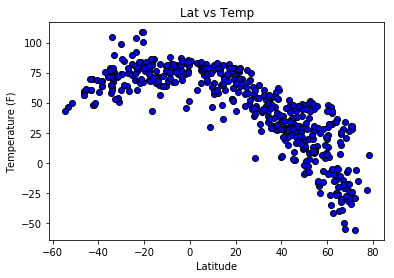

In [31]:
x_axis = city_weather_df['Latitude']
y_axis = city_weather_df['Temperature']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")

plt.title("Lat vs Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()


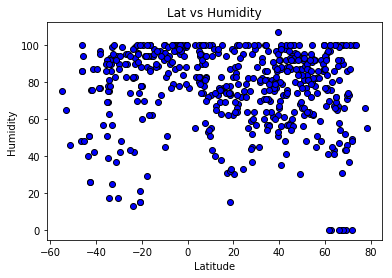

In [33]:
x_axis = city_weather_df['Latitude']
y_axis = city_weather_df['Humidity']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")

plt.title("Lat vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

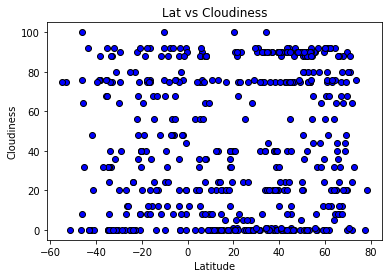

In [34]:
x_axis = city_weather_df['Latitude']
y_axis = city_weather_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")

plt.title("Lat vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

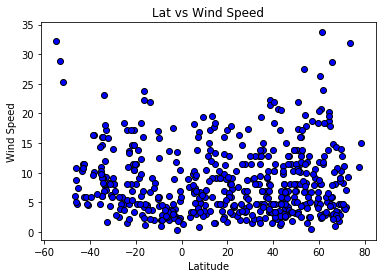

In [35]:
x_axis = city_weather_df['Latitude']
y_axis = city_weather_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")

plt.title("Lat vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()